In [1]:
# Importing pandas for numerical variable analysis and os, numpy, string, and nltk for text variable analysis.

import pandas as pd
import os as os
import numpy as np
import string as string
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
 

#nltk.download('stopwords')


In [2]:
bbSimple = pd.read_csv('bbNoText.csv')

In [3]:
# Split the data into training and testing sets with an 80/20 ratio
train_set, test_set = train_test_split(bbSimple, test_size=0.2, random_state=7)

# 'test_size' specifies the proportion of the dataset to include in the test split (0.2 means 20%)
# 'random_state' is used to ensure reproducibility, you can set it to any integer value for consistency

# You can now use 'train_set' and 'test_set' for your machine learning tasks


In [4]:
# Assuming 'target_column' is the name of the column you want to predict
X_train = train_set.drop(columns=['econ_index_levels'])
y_train = train_set['econ_index_levels']

X_test = test_set.drop(columns=['econ_index_levels'])
y_test = test_set['econ_index_levels']


In [12]:
bbSimple.columns

Index(['file_name', 'Date', 'Year', 'District', 'econ_index',
       'econ_index_levels', 'USPHCI', 'econ_index_dummy', 'compound_score',
       'mean_sentiment', 'median_sentiment', 'IQR_sentiment',
       'sentiment_trigram'],
      dtype='object')

In [5]:
X_train = X_train[['mean_sentiment', 'IQR_sentiment', 'median_sentiment', 'compound_score', 'sentiment_trigram']]
X_test = X_test[['mean_sentiment', 'IQR_sentiment', 'median_sentiment', 'compound_score', 'sentiment_trigram']]


## 3. Model Selection

Going to use a random forest to classify whether the economic index for a given month is positive (greater than the national index) or negative (less than the national index).

Random forest is an appropriate method for a classification problem like this. However, you could use the economic index score, rather than the dummy, and use a regression setup.

Classification was used because the interpretation of the results was more straightforward in this case: What percentage of cases were predicted correctly?

In [6]:
from sklearn.ensemble import RandomForestRegressor  # or RandomForestRegressor for regression

# Create a Random Forest model
model = RandomForestRegressor(n_estimators=100, random_state=7)  # You can adjust hyperparameters as needed

## 4. Model Training

In [7]:
# Train the model on the training data
model.fit(X_train, y_train)


RandomForestRegressor(random_state=7)

In [8]:
# Make predictions on the test data
predictions = model.predict(X_test)


In [9]:
from sklearn.metrics import mean_squared_error
import matplotlib.pyplot as plt

Mean Squared Error: 460.4417229088246


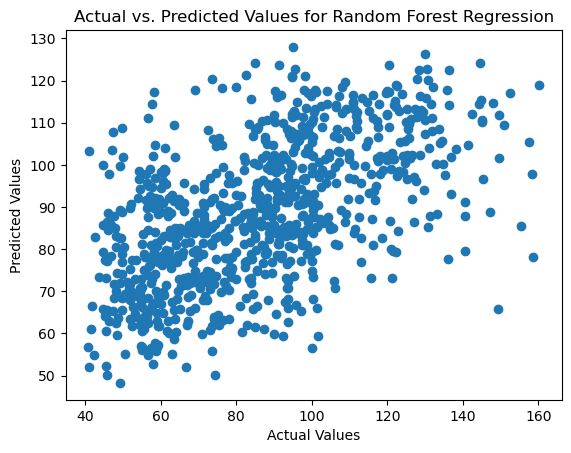

In [12]:
mse = mean_squared_error(y_test, predictions)
print(f'Mean Squared Error: {mse}')

# Plot actual vs. predicted values
plt.scatter(y_test, predictions)
plt.xlabel('Actual Values')
plt.ylabel('Predicted Values')
plt.title('Actual vs. Predicted Values for Random Forest Regression')
plt.show()

### 4.2 - 5-fold cross validation

In [13]:
from sklearn.model_selection import cross_val_predict, KFold

In [14]:
# Preparing data
X = bbSimple[['mean_sentiment', 'median_sentiment', 'IQR_sentiment', 'compound_score', 'sentiment_trigram']]  # Specify your features here
y = bbSimple['econ_index_levels']


In [15]:
model = RandomForestRegressor(n_estimators=100, random_state=7)  # You can adjust hyperparameters as needed


In [16]:
kf = KFold(n_splits=5, shuffle=True, random_state=42)  # Create a 5-fold cross-validation split

# Perform cross-validation and get predictions
predictions = cross_val_predict(model, X, y, cv=kf)


## 5. Model Evaluation

### 5.2 Cross-validation metric scores

Mean Squared Error: 511.54635068425495


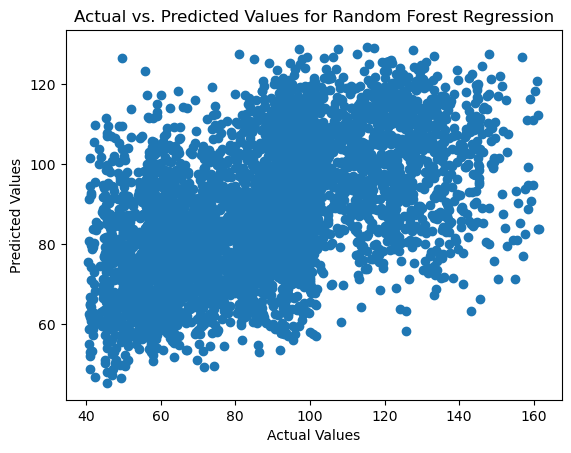

In [17]:
from sklearn.model_selection import cross_val_score

# Perform cross-validation and obtain metric scores (e.g., accuracy)
cv_scores = cross_val_score(model, X, y, cv=5)  # cv=5 means 5-fold cross-validation

# Print the cross-validated metric scores
mse = mean_squared_error(y, predictions)
print(f'Mean Squared Error: {mse}')

# Plot actual vs. predicted values
plt.scatter(y, predictions)
plt.xlabel('Actual Values')
plt.ylabel('Predicted Values')
plt.title('Actual vs. Predicted Values for Random Forest Regression')
plt.show()